# Mathematical background

Like the Python review, this doesn't cover all the math that could be relevant, just the important concepts for data analysis and machine learning.

I will _not_ be assuming that these concepts are familiar to you. **Ask questions!**

I also don't expect you to learn new mathematical topics quickly enough to pass a quiz or something: the goal here is for you to have _the right picture in mind_ while the computer performs the computations.

With the right picture in mind, you will be able to understand why we call the functions that we do, and what the outputs and plots mean.

Also, if you're learning any of these topics in school, you'll see what they lead to.

<br><br><br>

## N-dimensional space

At the end of the last notebook, we plotted the penguins like this:

<img src="img/02-side-by-side-plots.svg" width="1000">

344 flesh-and-blood penguins have been reduced to dots on paper (er, on a screen).

<br><br><br>

In general, this is how we approach all data analysis problems:

1. measure real-world quantities,
2. think of them as points in an N-dimensional space*,
3. a good statistical description or theoretical prediction should match the _points in space_ as closely as possible.

<br><br><br>

\* N-dimensional space: more than just 3-D

Physical space might have only 3 dimensions, but data can have any number of dimensions: any "N".

The following NumPy arrays cover 1-D, 2-D, 3-D, and 4-D grids with random numbers:

In [1]:
import numpy as np

In [2]:
one_dimensional_array = np.random.normal(0, 1, size=(5,))
one_dimensional_array

array([-0.1651706 ,  2.06878891, -0.67733053,  0.38506485,  0.78772077])

In [3]:
two_dimensional_array = np.random.normal(0, 1, size=(5, 5))
two_dimensional_array

array([[ 0.98169855,  0.2957248 ,  2.1389275 ,  0.36918573, -0.59365968],
       [-0.45374194, -1.62022533, -0.35420332, -1.29339235,  0.72576353],
       [ 3.0643817 , -0.78951947, -0.22581496, -0.1515053 ,  0.63798972],
       [-2.34319795, -1.32190408, -0.86403849, -0.64438146, -2.20867787],
       [-0.70867194, -1.18360766,  1.01019694,  0.04739937,  1.17414822]])

In [4]:
three_dimensional_array = np.random.normal(0, 1, size=(3, 5, 3))
three_dimensional_array

array([[[-1.39127947, -0.12502774, -1.44539147],
        [ 1.11201709,  0.94495736, -1.369214  ],
        [-0.64074936, -1.2184642 , -0.11238026],
        [-0.59901039,  0.55160574,  2.45690538],
        [-0.25821113,  0.05507227, -0.6632761 ]],

       [[ 0.02235316,  1.94548906, -0.95114784],
        [-1.07627062,  0.58800811,  1.54124697],
        [ 0.89192776, -0.03744641,  1.6044594 ],
        [-1.87161444,  0.63851153, -1.43683798],
        [ 0.73425872,  0.77388182, -0.25693293]],

       [[-0.6876268 ,  0.7133334 , -1.21389447],
        [ 0.67817307, -0.71013197,  1.37910368],
        [-0.9461419 , -1.35295838,  1.87347392],
        [-0.05095506, -0.21564334,  2.02163376],
        [-0.33945638, -0.49155759, -0.01174726]]])

In [5]:
four_dimensional_array = np.random.normal(0, 1, size=(2, 3, 5, 3))
four_dimensional_array

array([[[[-0.57591806,  1.30701281,  0.16478146],
         [-2.30698883,  0.16305371, -1.6677479 ],
         [-0.39140044, -0.31024517, -0.18171619],
         [-1.97303055,  0.39544317,  0.56745736],
         [ 2.70963881,  0.04572732, -1.42839602]],

        [[-1.80578675, -0.53994716, -0.10202516],
         [ 1.30695636,  0.47703595,  0.23877511],
         [-0.14014352,  0.31078087,  0.3438682 ],
         [ 0.02842294,  1.25719467,  0.8787974 ],
         [ 1.30780547,  0.8291655 ,  0.41895198]],

        [[ 0.95343722,  0.46994659,  0.60184179],
         [-1.54266948, -1.36941195,  1.34725811],
         [-1.54070971, -0.65022105, -0.5421465 ],
         [ 2.58297433,  0.2874537 , -0.83795822],
         [-0.91907332, -0.10116669,  0.64222391]]],


       [[[-0.18974316,  0.6898387 ,  1.37303213],
         [-0.98490214, -0.47904072, -0.76882413],
         [-0.12161376,  0.09036554,  0.05076675],
         [ 0.27927994, -0.71798881,  0.3510313 ],
         [ 2.6135561 ,  0.23477317, -0.757

<br><br><br>

We can visualize 2 dimensions as an image, presenting position along the grid spatially (the $x$ and $y$ axes) and the numbers as colors (dark blue to yellow in the default).

In [6]:
import matplotlib.pyplot as plt

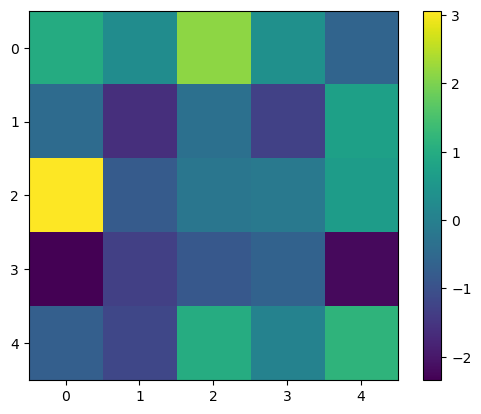

In [7]:
plt.imshow(two_dimensional_array)
plt.colorbar()

Or we could show the same thing as contour lines. (Note that the $y$ axis is flipped vertically between these two visualizations.)

<a list of 18 text.Text objects>

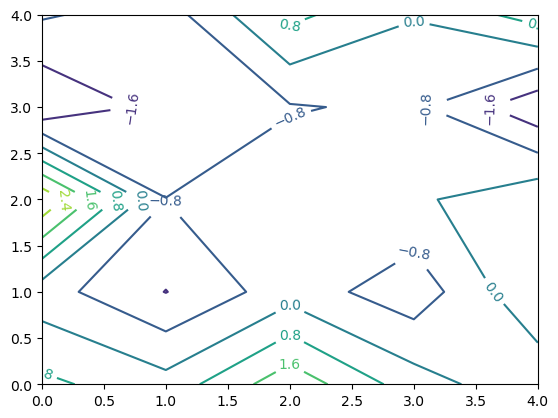

In [8]:
contour = plt.contour(two_dimensional_array)
plt.clabel(contour)

If we have more dimensions, we have to slice out a region of interest or sum/average over them to get something 2-D that we can visualize.

With one dimension, we can make the numbers $y$ positions of an $x$-$y$ plot, rather than colors:

Text(0, 0.5, 'numbers in the array')

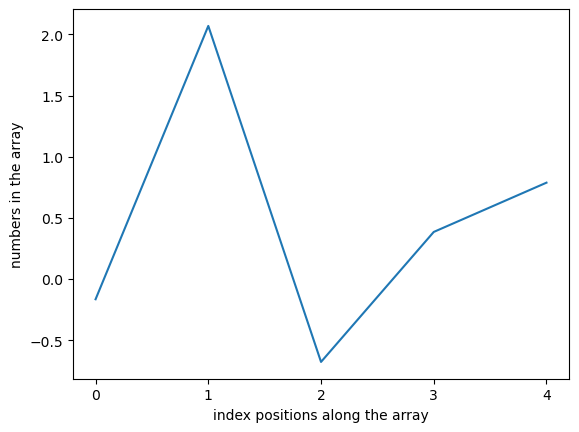

In [9]:
index_positions = np.arange(len(one_dimensional_array))

plt.plot(index_positions, one_dimensional_array)

plt.xticks(index_positions)
plt.xlabel("index positions along the array")
plt.ylabel("numbers in the array")

<br><br><br>

A 2-D example with not-so-random numbers:

In [10]:
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

three_spots = (
    1/(1 + (x + 0)**2 + (y + 0)**2) +     # spot centered at x=0,  y=0
    1/(1 + (x - 2)**2 + (y - 2)**2) +     # spot centered at x=2,  y=2
    1/(1 + (x + 3)**2 + (y - 3)**2)       # spot centered at x=-3, y=3
)

three_spots

array([[0.04420161, 0.04482222, 0.04544896, ..., 0.04564063, 0.04497169,
        0.04430893],
       [0.04508438, 0.04572927, 0.0463809 , ..., 0.04659843, 0.04590175,
        0.04521192],
       [0.04598885, 0.04665901, 0.04733658, ..., 0.04758163, 0.04685593,
        0.0461378 ],
       ...,
       [0.15915841, 0.16611608, 0.17337632, ..., 0.09666626, 0.09386209,
        0.09114467],
       [0.15331784, 0.15972007, 0.16637358, ..., 0.09414021, 0.09148704,
        0.0889115 ],
       [0.14766811, 0.15355806, 0.15965558, ..., 0.09168456, 0.08917366,
        0.08673218]])

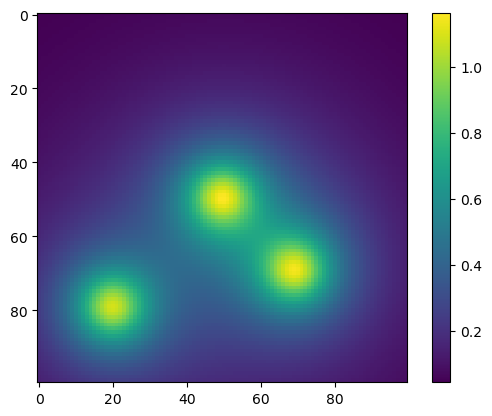

In [11]:
plt.imshow(three_spots)
plt.colorbar()

<a list of 12 text.Text objects>

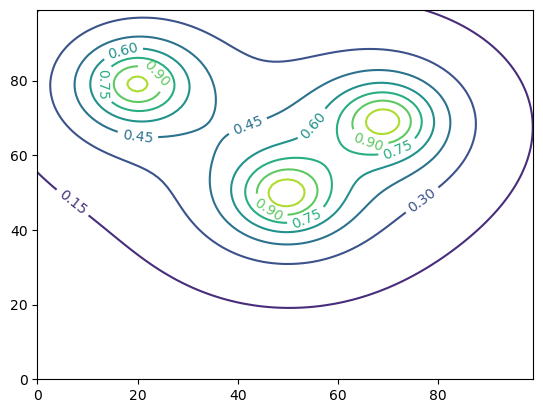

In [12]:
contour = plt.contour(three_spots)
plt.clabel(contour)

<br><br><br>

Slicing through the middle and plotting in 1-D:

In [13]:
one_dimensional_slice = three_spots[50, :]

Text(0, 0.5, 'numbers in the array')

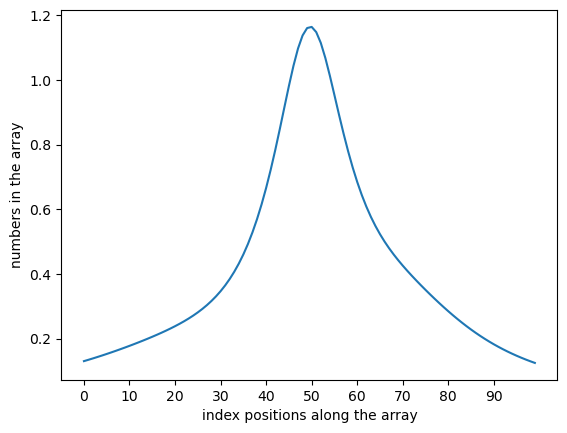

In [14]:
plt.plot(np.arange(len(one_dimensional_slice)), one_dimensional_slice)

plt.xticks(np.arange(0, len(one_dimensional_slice), 10))
plt.xlabel("index positions along the array")
plt.ylabel("numbers in the array")

<br><br><br>

Summing over the $y$ dimension and plotting in 1-D:

In [15]:
one_dimensional_projection = np.sum(three_spots, axis=0)

Text(0, 0.5, 'numbers in the array')

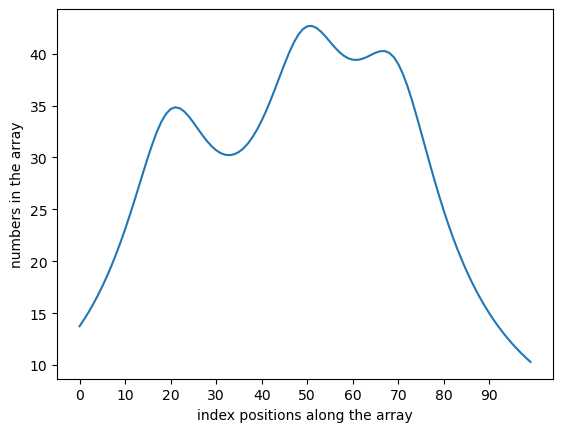

In [16]:
plt.plot(np.arange(len(one_dimensional_projection)), one_dimensional_projection)

plt.xticks(np.arange(0, len(one_dimensional_projection), 10))
plt.xlabel("index positions along the array")
plt.ylabel("numbers in the array")

<br><br><br>

Similarly, when we slice or project 3-D, 4-D, ... N-D arrays to visualize them in 1-D or 2-D, we're either cutting out parts or "squashing" parts together, or both.

<br><br><br>

## Measurements as N-dimensional points

In an array like

In [17]:
four_dimensional_array

array([[[[-0.57591806,  1.30701281,  0.16478146],
         [-2.30698883,  0.16305371, -1.6677479 ],
         [-0.39140044, -0.31024517, -0.18171619],
         [-1.97303055,  0.39544317,  0.56745736],
         [ 2.70963881,  0.04572732, -1.42839602]],

        [[-1.80578675, -0.53994716, -0.10202516],
         [ 1.30695636,  0.47703595,  0.23877511],
         [-0.14014352,  0.31078087,  0.3438682 ],
         [ 0.02842294,  1.25719467,  0.8787974 ],
         [ 1.30780547,  0.8291655 ,  0.41895198]],

        [[ 0.95343722,  0.46994659,  0.60184179],
         [-1.54266948, -1.36941195,  1.34725811],
         [-1.54070971, -0.65022105, -0.5421465 ],
         [ 2.58297433,  0.2874537 , -0.83795822],
         [-0.91907332, -0.10116669,  0.64222391]]],


       [[[-0.18974316,  0.6898387 ,  1.37303213],
         [-0.98490214, -0.47904072, -0.76882413],
         [-0.12161376,  0.09036554,  0.05076675],
         [ 0.27927994, -0.71798881,  0.3510313 ],
         [ 2.6135561 ,  0.23477317, -0.757

every grid position in the 4-D space is filled with a number.

The penguin data is also 4 dimensional, but it's different:

In [18]:
import pandas as pd

In [19]:
penguins = pd.read_csv("data/penguins.csv")
penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


The 4 dimensions of "bill length", "bill depth", "flipper length", and "body mass" are presented in a 2 dimensional table.

Also, we plot them as points, not as space-filling colors or curves.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

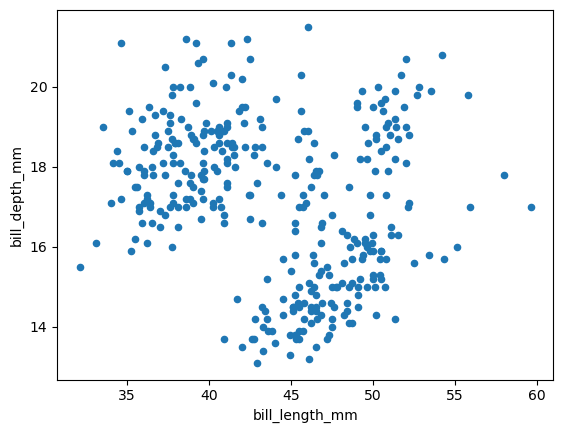

In [20]:
penguins.plot.scatter("bill_length_mm", "bill_depth_mm")

<br><br><br>

The data can be presented as a NumPy array,

In [21]:
penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  49.6,   18.2,  193. , 3775. ],
       [  50.8,   19. ,  210. , 4100. ],
       [  50.2,   18.7,  198. , 3775. ]])

but it has a different interpretation: instead of interpreting the index position along the array as $x$ or $y$, we're now interpreting

* a number in the first column as the position in the first dimension,
* a number in the second column as the position in the second dimension,
* a number in the third column as the position in the third dimension,
* a number in the fourth column as the position in the fourth dimension.

A data frame represents as many dimensions as it has _columns_.

In [22]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<br><br><br>

## Measurements and models

These are the two fundamental concepts of data analysis (and science in general):

* **measurements** are a finite number of N-dimensional points that come from the real world; they are _experimental_,
* **models** are mathematical predictions of what is expected to happen at any given N-dimensional point; they are _theoretical_.

<br><br><br>

As an example, suppose we measure two quantities, $x$ and $y$, 100 times.

The result is not always the same because of measurement error or changes with time or some other variable (human choice...).

In [23]:
# Although we're randomly generating these points, pretend that they come from a measurement device.
measurement_x = np.random.normal(3, 1, 100)
measurement_y = np.random.normal(2, 1, 100)

measurements = np.column_stack((measurement_x, measurement_y))
measurements

array([[ 1.71881977,  2.10923824],
       [ 0.98387651,  2.67749331],
       [ 2.24131528,  2.33097869],
       [ 4.1660916 ,  0.09685166],
       [ 2.57052605,  2.39411194],
       [ 1.26016881,  1.17513217],
       [ 3.47547034,  0.59023472],
       [ 3.32787246,  2.1557994 ],
       [ 3.18665972, -0.02022539],
       [ 2.77668726,  2.15797596],
       [ 3.27137227,  1.32127396],
       [ 1.356786  ,  1.53499424],
       [ 2.27196902,  1.18867102],
       [ 4.31395112,  3.20129515],
       [ 2.90377764,  0.00899284],
       [ 2.24294545,  3.63636316],
       [ 1.06034573, -0.17155325],
       [ 2.37061143,  1.77592024],
       [ 2.7702326 ,  1.51838947],
       [ 3.44927994,  2.19248819],
       [ 0.81926727,  2.76871667],
       [ 4.18734504,  3.62327032],
       [ 4.69914652,  1.93750848],
       [ 5.0075343 ,  1.89413281],
       [ 1.81206498,  1.84628005],
       [ 2.80211629,  1.00188518],
       [ 3.7525074 ,  2.75738441],
       [ 4.00771918,  1.71581001],
       [ 3.02214443,

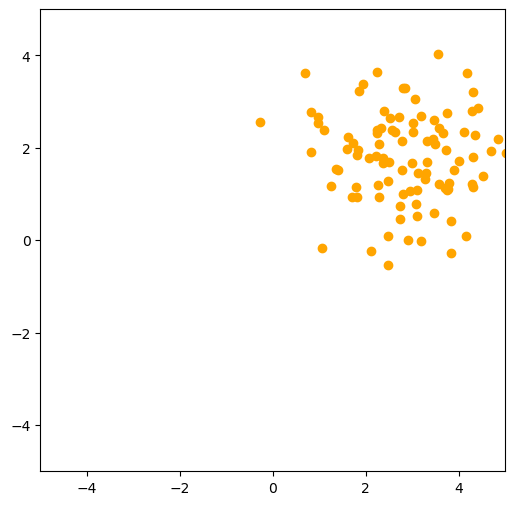

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(measurement_x, measurement_y, color="orange")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

None

This model, which returns "probability density of (x, y)" for any (x, y) grid point, describes the data well.

In [25]:
def good_model(x, y):
    return np.exp(-((x - 3)**2 + (y - 2)**2)/2)/2/np.pi

In [26]:
x, y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
probability = good_model(x, y)
probability

array([[4.61510838e-26, 4.99963711e-26, 5.41566192e-26, ...,
        5.13237637e-13, 5.03140396e-13, 4.93192384e-13],
       [4.94984034e-26, 5.36225878e-26, 5.80845771e-26, ...,
        5.50462557e-13, 5.39632967e-13, 5.28963430e-13],
       [5.30831835e-26, 5.75060502e-26, 6.22911863e-26, ...,
        5.90328232e-13, 5.78714340e-13, 5.67272092e-13],
       ...,
       [2.37721391e-17, 2.57528229e-17, 2.78957410e-17, ...,
        2.64365546e-04, 2.59164520e-04, 2.54040360e-04],
       [2.30723409e-17, 2.49947179e-17, 2.70745534e-17, ...,
        2.56583221e-04, 2.51535301e-04, 2.46561985e-04],
       [2.23908996e-17, 2.42564991e-17, 2.62749067e-17, ...,
        2.49005038e-04, 2.44106209e-04, 2.39279779e-04]])

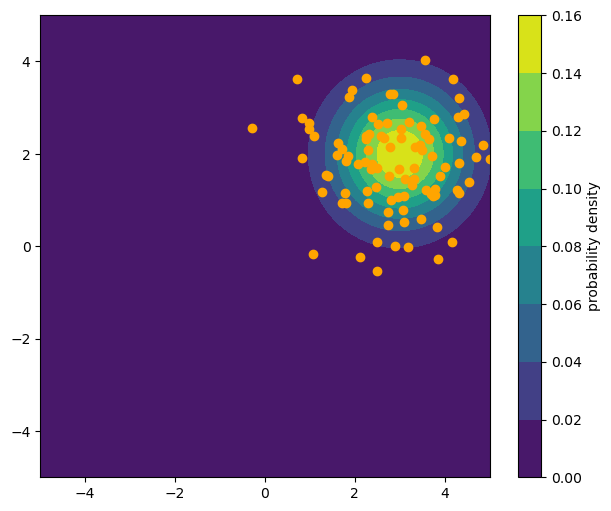

In [27]:
fig, ax = plt.subplots(figsize=(7.25, 6))

contour = ax.contourf(x, y, probability)
ax.scatter(measurement_x, measurement_y, color="orange")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
fig.colorbar(contour, label="probability density")

None

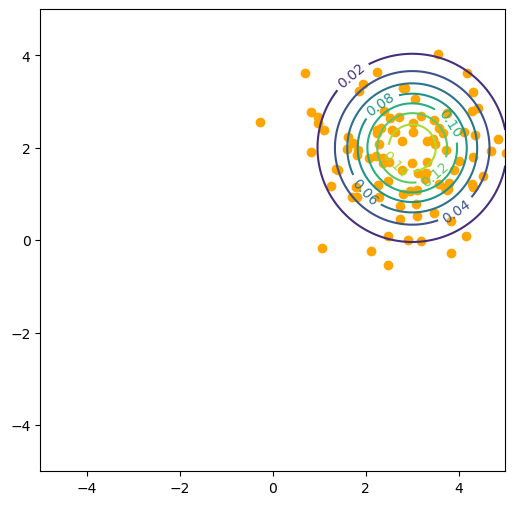

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

contour = ax.contour(x, y, probability)
ax.clabel(contour)
ax.scatter(measurement_x, measurement_y, color="orange")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

None

<br><br><br>

And this is a bad model:

In [29]:
def bad_model(x, y):
    return np.exp(-(4*(x + 2)**2 + y**2)/4)/2/np.pi

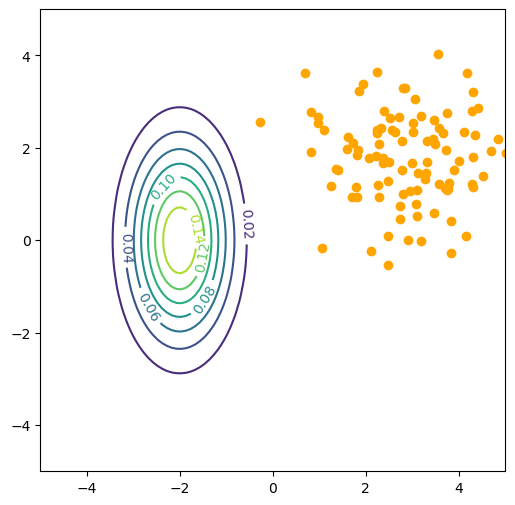

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))

x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
probability = bad_model(x, y)

contour = ax.contour(x, y, probability)
ax.clabel(contour)
ax.scatter(measurement_x, measurement_y, color="orange")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

None

<br><br><br>

It's a bad model because

1. most of the experimentally observed points are at $x$, $y$ points that the model says should have low probability,
2. if we were to use the model to _generate_ (simulate) fake data, the fake data are very different from the real data.

In [31]:
# Only summing them to show that they're generally large numbers; not saying this is a statistically meaningful thing to do...
np.sum(good_model(measurement_x, measurement_y))

7.292680243661028

In [32]:
# Same thing, but from the bad model, they're generally small numbers—much smaller!
np.sum(bad_model(measurement_x, measurement_y))

0.001672975856205786

<br><br><br>

In [33]:
def generate(model):
    while True:
        x = np.random.uniform(-5, 5)
        y = np.random.uniform(-5, 5)
        p = np.random.uniform(0, 1)
        if p < model(x, y):
            return x, y

In [34]:
for i in range(10):
    print(generate(good_model))

(4.399012899275155, 2.6413267670371336)
(4.481428932719879, 1.981514919156151)
(4.384984054700157, 2.3850338146472927)
(2.4504061972328692, 1.7758055237730277)
(3.0342706100495835, 2.452932487422985)
(4.836496042171506, 1.8098596933053592)
(2.0055246465833667, 1.517561364778489)
(3.6414561338133744, 2.6944318879760676)
(3.6466636148437814, 2.4817166430546624)
(2.5847166024017802, 3.427879636809429)


In [35]:
for i in range(10):
    print(generate(bad_model))

(-1.8260856457746435, 1.6843620605537888)
(-2.543462752221749, -0.7247969937387309)
(-2.5101977772732043, 0.4561136737457776)
(-2.45758611359674, -0.04899005390625799)
(-1.6518089742390716, 0.4666846641809581)
(-2.335022728172842, -1.0643744540289757)
(-1.7726801275708204, 2.422704804654372)
(-1.8073647878523147, 0.47325478208324334)
(-1.7607526525008375, -1.6716726824456387)
(-2.151237821683347, 1.968403368688846)


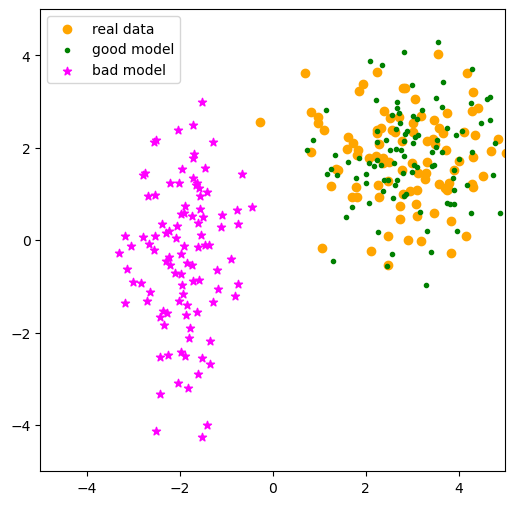

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))

good_fake_data = np.zeros((100, 2))
bad_fake_data = np.zeros((100, 2))

for i in range(100):
    good_fake_data[i, :] = generate(good_model)
    bad_fake_data[i, :] = generate(bad_model)

ax.scatter(measurement_x, measurement_y, color="orange", label="real data")
ax.scatter(good_fake_data[:, 0], good_fake_data[:, 1], color="green", marker=".", label="good model")
ax.scatter(bad_fake_data[:, 0], bad_fake_data[:, 1], color="magenta", marker="*", label="bad model")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend(loc="upper left")

None

<br><br><br>

A model _generalizes_ the measurements.

Whereas a measurement says what the data _are_, a model says what the data _would be_.

<br><br><br>

The `bad_model` above "underfits" the data because its predictions are usually wrong.

It's also possible to "overfit", to be right too often:

In [37]:
def generate_overfitted_model():
    x, y = measurements[np.random.randint(0, len(measurements))]  # take a value from the measurements
    x = x + np.random.normal(0, 0.01)                             # jiggle it so that it's not EXACTLY the same
    y = y + np.random.normal(0, 0.01)
    return x, y

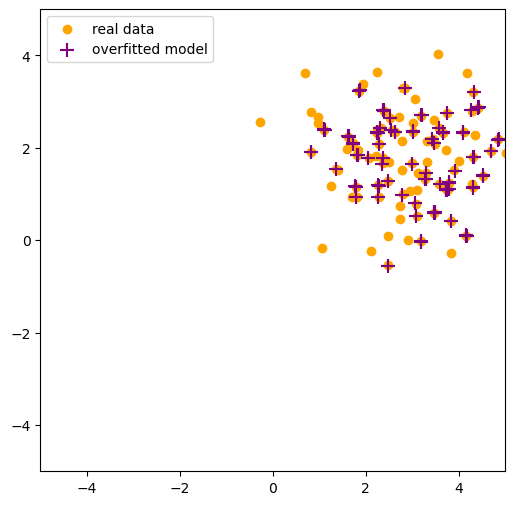

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))

overfitted_fake_data = np.zeros((100, 2))

for i in range(100):
    overfitted_fake_data[i, :] = generate_overfitted_model()

ax.scatter(measurement_x, measurement_y, color="orange", label="real data")
ax.scatter(overfitted_fake_data[:, 0], overfitted_fake_data[:, 1], color="purple", marker="+", s=100, label="overfitted model")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend(loc="upper left")

None

<br><br><br>

There are ways to deal with overfitting (don't use all of the measurements to fit the model; hold some in reserve to test the model), but we won't go into it in this workshop.

<br><br><br>

## Statistics

Real-world measurements are never exact and populations are never homogenous, so models are statistical.

We need some statistical concepts.

### Probability distribution

A **probability distribution** is a model of how probable each value in a set of possibilities is.

For example, for a single (fair) die,

<img src="img/dice-1.svg" width="200">

the probability of rolling the die and getting a particular side up is 1/6 for each of the 6 sides, a uniform probability distribution.

In [39]:
possibilities = ["⚀", "⚁", "⚂", "⚃", "⚄", "⚅"]
probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

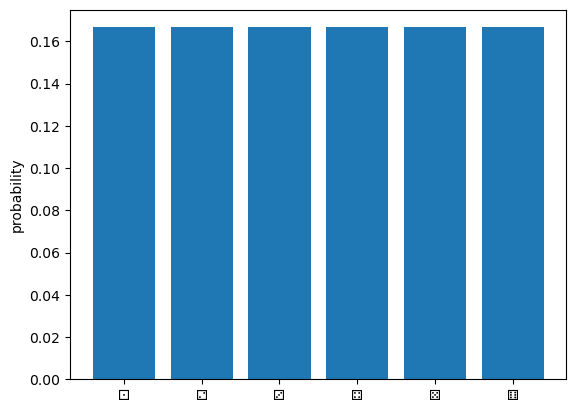

In [40]:
fig, ax = plt.subplots()

ax.bar(range(6), probabilities)

ax.set_xticks(range(6), possibilities)
ax.set_ylabel("probability")

None

<br><br><br>

For two (fair) dice,

<img src="img/dice-2.svg" width="200">

the probability of rolling the dice and getting a total score of 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, or 12 is not uniform, since there's only one way to get 2 or 12, but 6 ways to get 7.

In [49]:
score_of_one_die = {"⚀": 1, "⚁": 2, "⚂": 3, "⚃": 4, "⚄": 5, "⚅": 6}

# for each possible score (keys), initialize the number of ways to get it (values) to zero
ways_to_get = {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

# try all combinations and count the number of ways to get each score
for die1 in ["⚀", "⚁", "⚂", "⚃", "⚄", "⚅"]:
    for die2 in ["⚀", "⚁", "⚂", "⚃", "⚄", "⚅"]:
        score = score_of_one_die[die1] + score_of_one_die[die2]
        print(die1, die2, "has a total score of", score)

        ways_to_get[score] += 1

# Note: "x += 1" is shorthand for "x = x + 1".

⚀ ⚀ has a total score of 2
⚀ ⚁ has a total score of 3
⚀ ⚂ has a total score of 4
⚀ ⚃ has a total score of 5
⚀ ⚄ has a total score of 6
⚀ ⚅ has a total score of 7
⚁ ⚀ has a total score of 3
⚁ ⚁ has a total score of 4
⚁ ⚂ has a total score of 5
⚁ ⚃ has a total score of 6
⚁ ⚄ has a total score of 7
⚁ ⚅ has a total score of 8
⚂ ⚀ has a total score of 4
⚂ ⚁ has a total score of 5
⚂ ⚂ has a total score of 6
⚂ ⚃ has a total score of 7
⚂ ⚄ has a total score of 8
⚂ ⚅ has a total score of 9
⚃ ⚀ has a total score of 5
⚃ ⚁ has a total score of 6
⚃ ⚂ has a total score of 7
⚃ ⚃ has a total score of 8
⚃ ⚄ has a total score of 9
⚃ ⚅ has a total score of 10
⚄ ⚀ has a total score of 6
⚄ ⚁ has a total score of 7
⚄ ⚂ has a total score of 8
⚄ ⚃ has a total score of 9
⚄ ⚄ has a total score of 10
⚄ ⚅ has a total score of 11
⚅ ⚀ has a total score of 7
⚅ ⚁ has a total score of 8
⚅ ⚂ has a total score of 9
⚅ ⚃ has a total score of 10
⚅ ⚄ has a total score of 11
⚅ ⚅ has a total score of 12


In [42]:
ways_to_get

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

In [43]:
ways_to_get_anything = sum(ways_to_get.values())
ways_to_get_anything

36

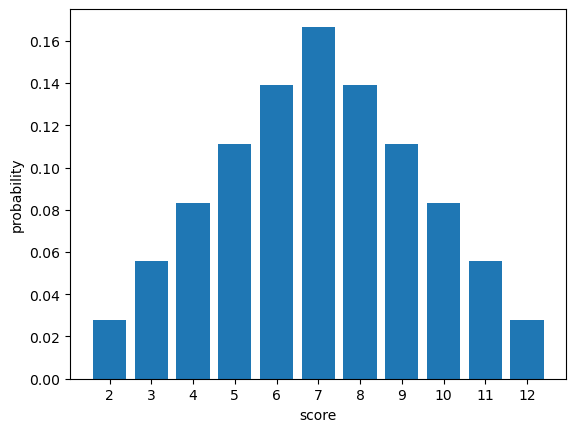

In [44]:
fig, ax = plt.subplots()

probabilities = []
for score, number_of_ways in ways_to_get.items():
    probabilities.append(number_of_ways / ways_to_get_anything)

ax.bar(ways_to_get.keys(), probabilities)

ax.set_xticks(list(ways_to_get.keys()), ways_to_get.keys())
ax.set_xlabel("score")
ax.set_ylabel("probability")

None

<br><br><br>

Any shape is possible, but a distribution must always have a total probability of 1.

In [47]:
sum(probabilities)

1.0000000000000002

<br><br><br>

### Descriptive statistics

**Descriptive statistics** are numbers that summarize a distribution or a collection of measurements.

For example, the **mean** (also known as average) of the two-dice probability distribution can be computed like this:

In [50]:
numerator = 0
denominator = 0

for score, number_of_ways in ways_to_get.items():
    numerator += score * number_of_ways
    denominator += number_of_ways

mean = numerator / denominator
mean

7.0

The **median**, or middle of the distribution is also 7, and the **mode**, or most probable possibility, is also 7, for this distribution.

<br><br><br>

With a Pandas data frame, you can get most of the descriptive statistics with `describe`:

In [48]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


* `count` is just the number of non-missing values,
* `mean` is the **mean**,
* `std` is the **standard deviation**, or how "spread out" the distribution is,
* `min` and `max` are the minimum and maximum values in a dataset, which could also be called `0%` and `100%` above,
* `50%` is the **median** (not exactly the same as the **mean**),
* `25%` and `75%` are lower and upper **quartiles**.

<br><br><br>

We'll also need to talk about the **correlation** between two quantities, which describes how closely one distribution "follows" another.

Penguin flipper length and body mass are highly correlated:

* penguins with small flippers have small mass
* penguins with big flippers have big mass

In [52]:
penguins["flipper_length_mm"].corr(penguins["body_mass_g"])

0.8712017673060114

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

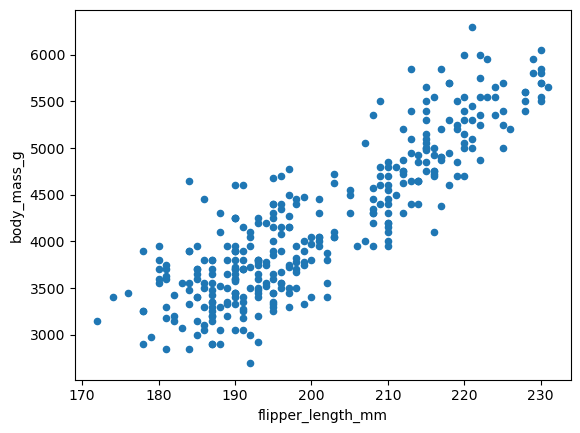

In [53]:
penguins.plot.scatter("flipper_length_mm", "body_mass_g")

Penguin bill length and depth are not very correlated (even a little anti-correlated):

* short, shallow
* short, deep
* long, shallow
* long, deep

are roughly equal in distribution (ignoring differences among species).

<img src="img/culmen_depth.png" width="400">

In [54]:
penguins["bill_length_mm"].corr(penguins["bill_depth_mm"])

-0.2350528703555326

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

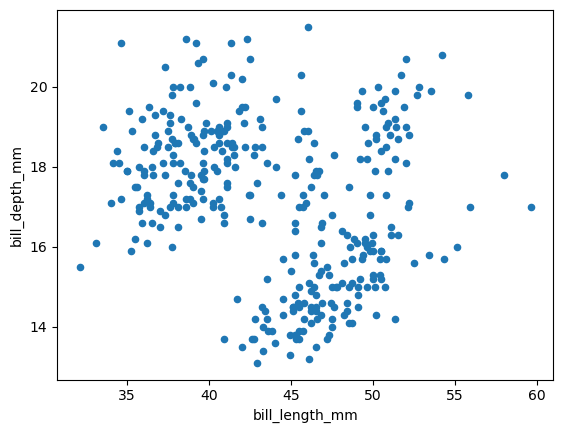

In [55]:
penguins.plot.scatter("bill_length_mm", "bill_depth_mm")

<br><br><br>

A **correlation** between _A_ and _B_:

* can be as high as 1 if _A_ always increases and decreases proportionally with _B_: one distribution is a positive multiple of the other,
* can be as log as ‒1 if _A_ always decreases in proportion to _B_'s increases: one distribution is a negative multiple of the other,
* can be 0 if _A_ has nothing to do with _B_.

<br><br><br>